<a href="https://colab.research.google.com/github/alexcohenn23/bio108tutorial/blob/main/Week_7_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Homework Analysis


### This week's overarching question: How does deforestation amplify/affect Species Richness of Threateneded Bird Species:






In [ ]:
#Step #1 Import required packages for analysis:

In [ ]:
! pip install rasterio
! pip install rasterstats
! pip install earthpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s eta 0:00:00


In [ ]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.mask
import rasterio.features
import rasterstats
from rasterio.mask import mask
from rasterio.warp import reproject, Resampling
from rasterio.crs import CRS


# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


In [ ]:
#### Packages we must install - may use leafmap
import leafmap
import fiona
import geopandas as gpd

### Step #2: Import Raster data in

Link to google drive of data: https://drive.google.com/drive/folders/17tIg5jbgyh909ZtY7XKxPgAo4gIw68S0



In [ ]:
# Importing Data In:
# importing data in
from google.colab import drive
drive.mount('/content/drive')


#not entirely sure what each tif/raster data file contains but each holds one part of the raster file
ovr = "/content/drive/MyDrive/BIOL108/Birds_THR_SR_2024/Birds_THR_SR_2024.tif.ovr"
src_ovr = rasterio.open(ovr)

tif = "/content/drive/MyDrive/BIOL108/Birds_THR_SR_2024/Birds_THR_SR_2024.tif"
src_tif = rasterio.open(tif)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
src_tif.meta

{'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': -128.0,
 'width': 1204,
 'height': 592,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30000.0, 0.0, -18058187.677929368,
        0.0, -30000.0, 8764905.85562796)}

### Step #3: Plotting Raster data files

<Axes: >

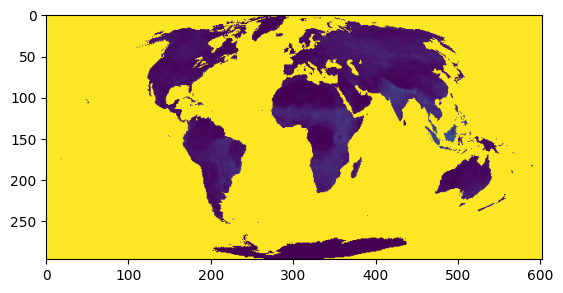

In [ ]:
#plotting first layer/part of the raster data image

fig, ax = plt.subplots()
rasterio.plot.show(src_ovr, ax=ax)

<Axes: >

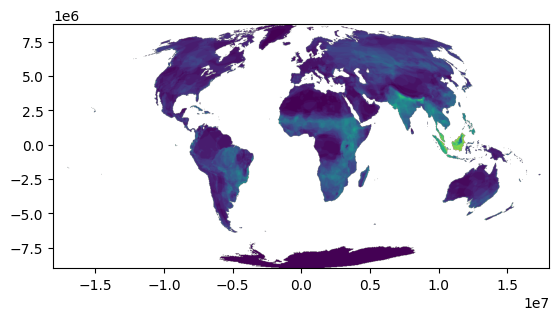

In [ ]:
#plotting second part/layer of the raster data image

fig, ax = plt.subplots()
rasterio.plot.show(src_tif, ax=ax)

##Importing Vector Data In

```Using data from https://globil-panda.opendata.arcgis.com/datasets/46b29ddaf2a54730844000ce8c431f83/about for deforestation data. To discover if there is a correlation between species richness for threatened species and deforestation hotspots.```

In [ ]:
deforest_shp = '/content/drive/MyDrive/BIOL108/def_fronts/New_Deforestation_Fronts_wgs.shp'
deforest = gpd.read_file(deforest_shp)
deforest = deforest.to_crs(src_tif.crs)

In [ ]:
deforest.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

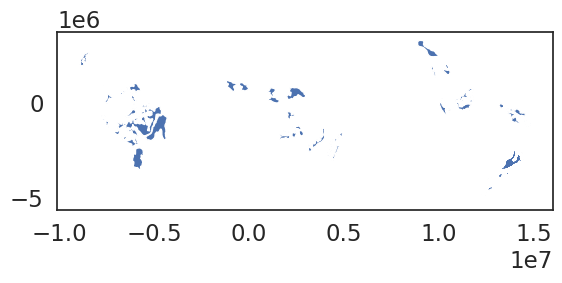

In [ ]:
#looking at blank deforest plot to ensure data is properly aligned/plotted

deforest.plot()




### Putting all data/plots together:

<Axes: >

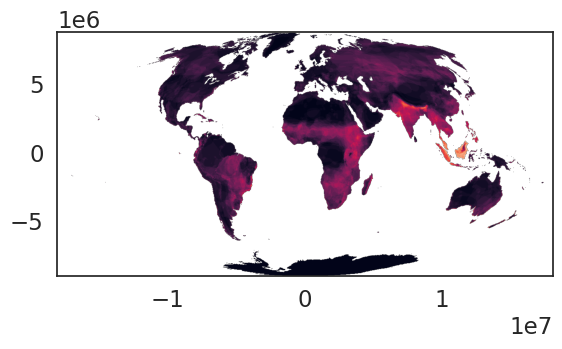

In [ ]:
#plotting both parts/layers of the raster data together to create cohesive map of threatened species richness


fig, ax = plt.subplots()
rasterio.plot.show(src_tif, src_ovr, ax=ax)

'''able to see how the threatened bird species richness vaires across the world. Threatened bird species are most popolous in Africa, South America,
and Southern Asia.'''

<Axes: title={'center': 'Threatened Birds Species Richness'}>

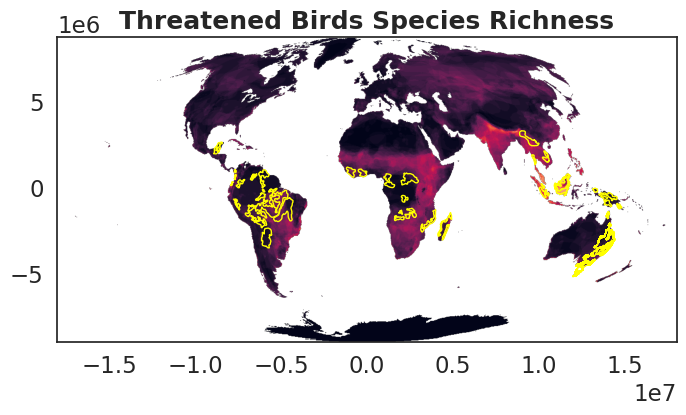

In [ ]:
#Combining both the raster and vector data files to plot analysis:

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src_tif, src_ovr, ax=ax, title="Threatened Birds Species Richness")
deforest.plot(ax=ax, edgecolor="yellow", facecolor="none", lw=1)

#### The plot above illustrates that the most notable instances of deforestation generally occur on the outer ring of high densities of threatened bird species on the heat map.

---

